In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk

In [2]:
def return_values_xy():
    list_x = []
    list_y = []
    for cord in open('data_points.txt', 'r'):
        if ',' in cord:
            h = cord.split(',')
            list_x.append(float(h[0].strip()))
            h[1] = h[1][:h[1].index('\n')] if '\n' in h[1] else h[1]
            list_y.append(float(h[1].strip()))
    return np.array(list_x), np.array(list_y)

In [3]:
def trans_to_poly(X, degree):
    Xp = np.ones((len(X), degree))
    for row in range(len(X)):
        for col in range(1, degree):
                Xp[row, col] = X[row]**col
    return Xp
    

In [4]:
def X_plot():
    fig_limit = 15
    X, y = return_values_xy()
    plt.figure(figsize=(15, 9))
    plt.xlim(-fig_limit, fig_limit)
    plt.ylim(-fig_limit, fig_limit)
    plt.xticks(np.arange(-fig_limit, fig_limit+1, 1.0))
    plt.yticks(np.arange(-fig_limit, fig_limit+1, 1.0))
    plt.scatter(X, y, marker='.', s=[300 for i in range(len(X))])
    plt.savefig('unfittedplot.png')
    return

In [5]:
def the_plot():
    fig_limit = 15
    X, y = return_values_xy()
    calculate_thetas = lambda X, y: np.linalg.inv(X).dot(y.reshape(-1, 1))
    
    X_n = np.linspace(-fig_limit, fig_limit, 1000)
    X_poly, X_npoly = trans_to_poly(X, len(X)), trans_to_poly(X_n, len(X))
    thetas = calculate_thetas(X_poly, y).reshape(-1)
    degree = len(X)
    y_n = X_npoly.dot(thetas)
    plt.figure(figsize=(15, 9))
    plt.xlim(-fig_limit, fig_limit)
    plt.ylim(-fig_limit, fig_limit)
    plt.xticks(np.arange(-fig_limit, fig_limit+1, 1.0))
    plt.yticks(np.arange(-fig_limit, fig_limit+1, 1.0))
    plt.plot(X_n, y_n, linewidth=3)
    plt.scatter(X, y, marker='.', s=[300 for i in range(len(X))])
    plt.savefig('fittedplot.png')
    return


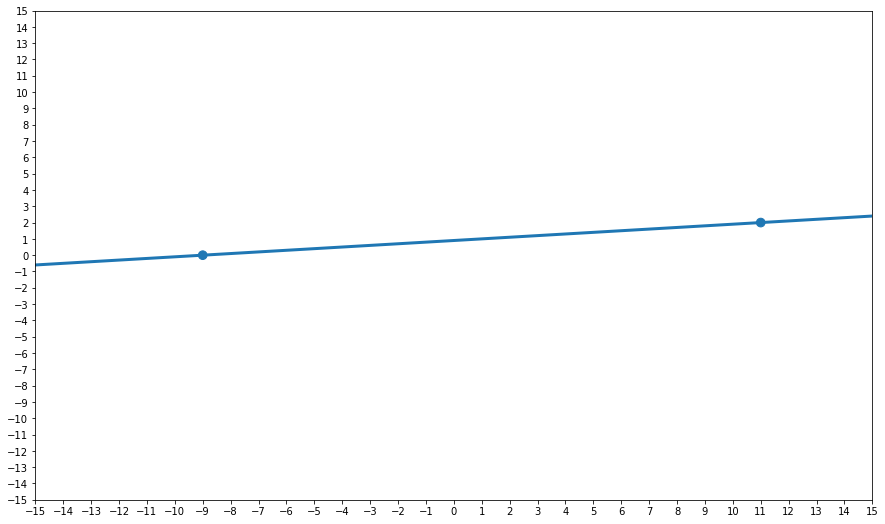

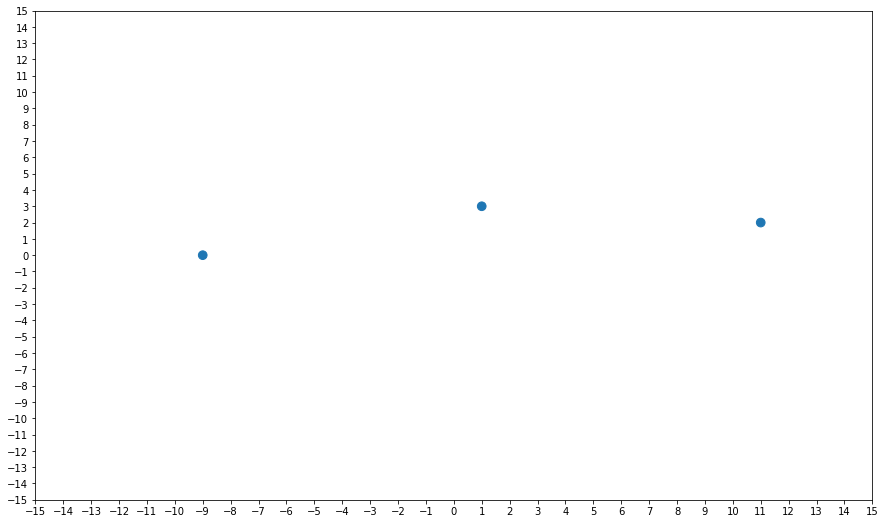

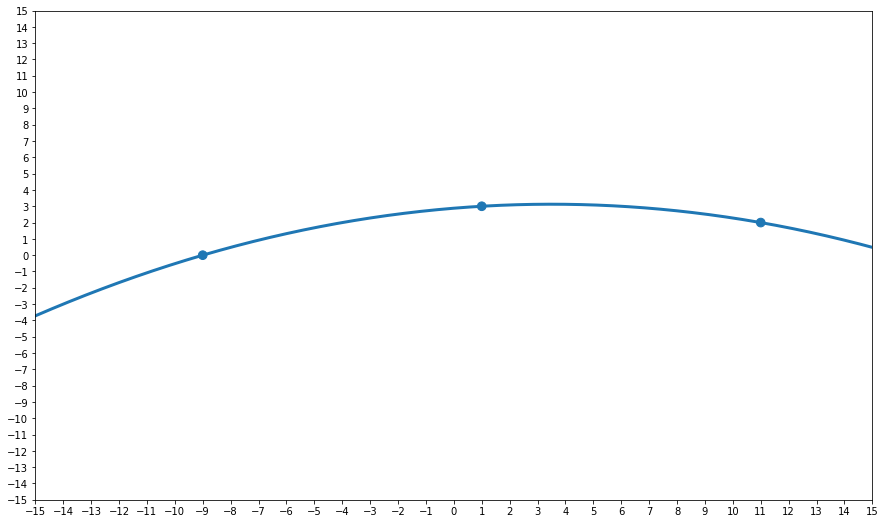

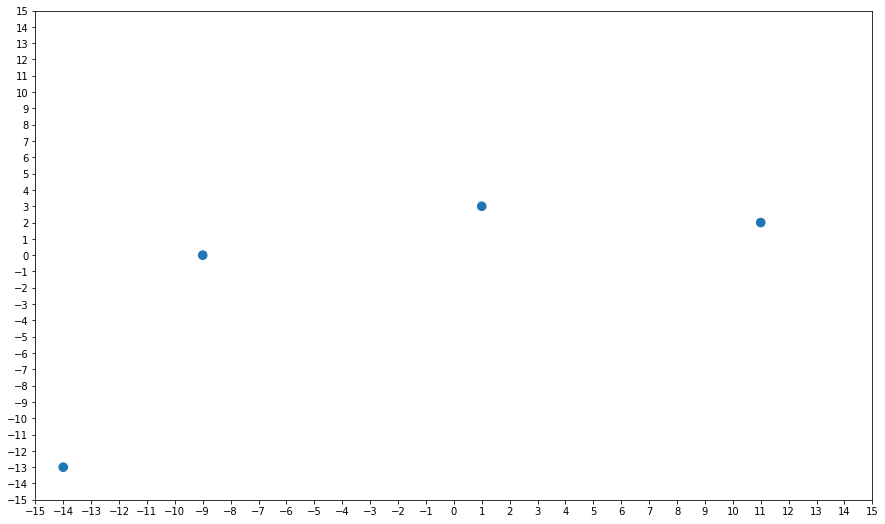

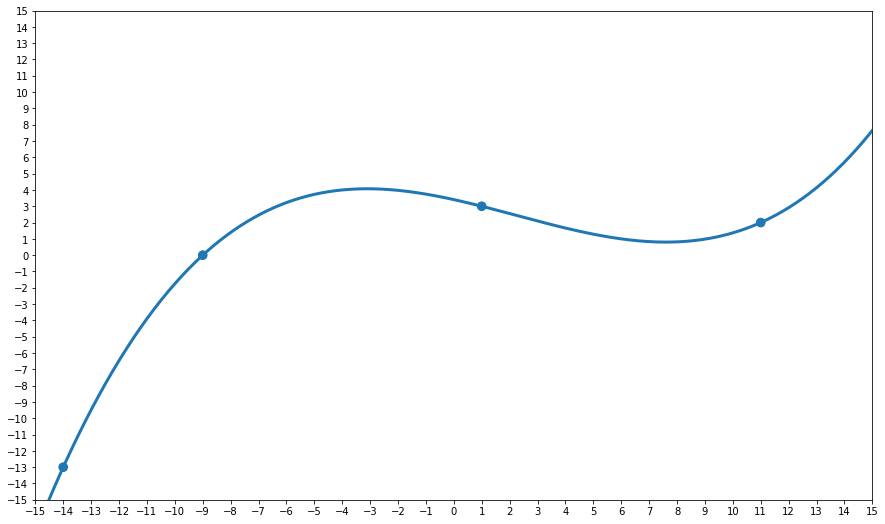

In [6]:
from tkinter import *

class Window():
    def __init__(self):
        self.canvas = Canvas(root, width = 3000, height = 1000)
        self.img = PhotoImage(file="unfittedplot.png")
        self.imgArea = self.canvas.create_image(17, -50, anchor = NW, image = self.img)
        self.canvas.pack()
        self.but1 = Button(root, text="Fit Points", command=lambda: self.Fit_datapoints())
        self.but1.place(x=10, y=500)
        self.but2 = Button(root, text="Get New Data Points", command=lambda: self.Get_new_data_points())
        self.but2.place(x=10, y=400)


    def Fit_datapoints(self):
        the_plot()
        self.img = PhotoImage(file="fittedplot.png")
        self.canvas.itemconfig(self.imgArea, image = self.img)
    def Get_new_data_points(self):
        X_plot()
        self.img = PhotoImage(file="unfittedplot.png")
        self.canvas.itemconfig(self.imgArea, image = self.img)



root = Tk()
root.title('Fit n degree polynomial to bunch of points')
root.geometry("1000x600")
app = Window()
root.configure(bg='white')


root.mainloop()